# 01- Apache Spark & Distributed Data Basics

## 🌟 What is Apache Spark?

> **Apache Spark is an open-source unified compute/analytics engine designed for large-scale distributed data processing. It leverages in-memory computation to deliver high performance and provides high-level APIs in multiple languages, along with built-in libraries for SQL, streaming, machine learning, and graph processing, all operating across a cluster..**<P>Apache Spark is an unified, open-source, distributed computing system designed for fast, large-scale data processing and analytics. It enables in-memory computation, making it significantly faster—up to 100 times—than traditional disk-based systems like Hadoop MapReduce. <p>
Spark supports batch, streaming, machine learning (MLlib), and graph processing via APIs in Python, Scala, Java, and R.<p>
<b>Note: The project was originally started in 2009 as a research project at UC Berkeley's AMPLab and was open-sourced in 2010.</b>

**Simple definition**  
Spark lets you process big data across many machines as if you were working on one huge computer.

Spark relies on group of machines instead of just one machine, and that group of machines is called as **Cluster -- In Apache Spark it is called as cluster of nodes.**<br>
**Node --> Machines**<br>
**Cluster --> Group of Machines**<br>

---

### ❓ Why Spark exists

| Problem           | Pandas / SQL |
|-------------------|--------------|
| Data too large    | ❌ Memory limited |
| Slow processing   | ❌ Disk-based |
| Scalability       | ❌ Single machine |

**Spark solves all of these.**

---

### 🧠 Spark vs Pandas vs SQL (Very Important)

| Feature           | Pandas        | SQL          | Spark |
|-------------------|---------------|--------------|-------|
| Data size         | Small         | Medium       | Very large |
| Execution         | Single machine| DB engine    | Cluster |
| Speed             | In-memory     | Disk-based   | In-memory + distributed |
| Fault tolerance  | ❌            | Partial      | ✅ |


# 🌟 Monolithic vs Distributed approaches

How big data is handled using **Monolithic vs Distributed** approaches, what each really means, and why distributed wins at scale.

---

## 1️⃣ Monolithic Approach (Single-Node / Centralized)
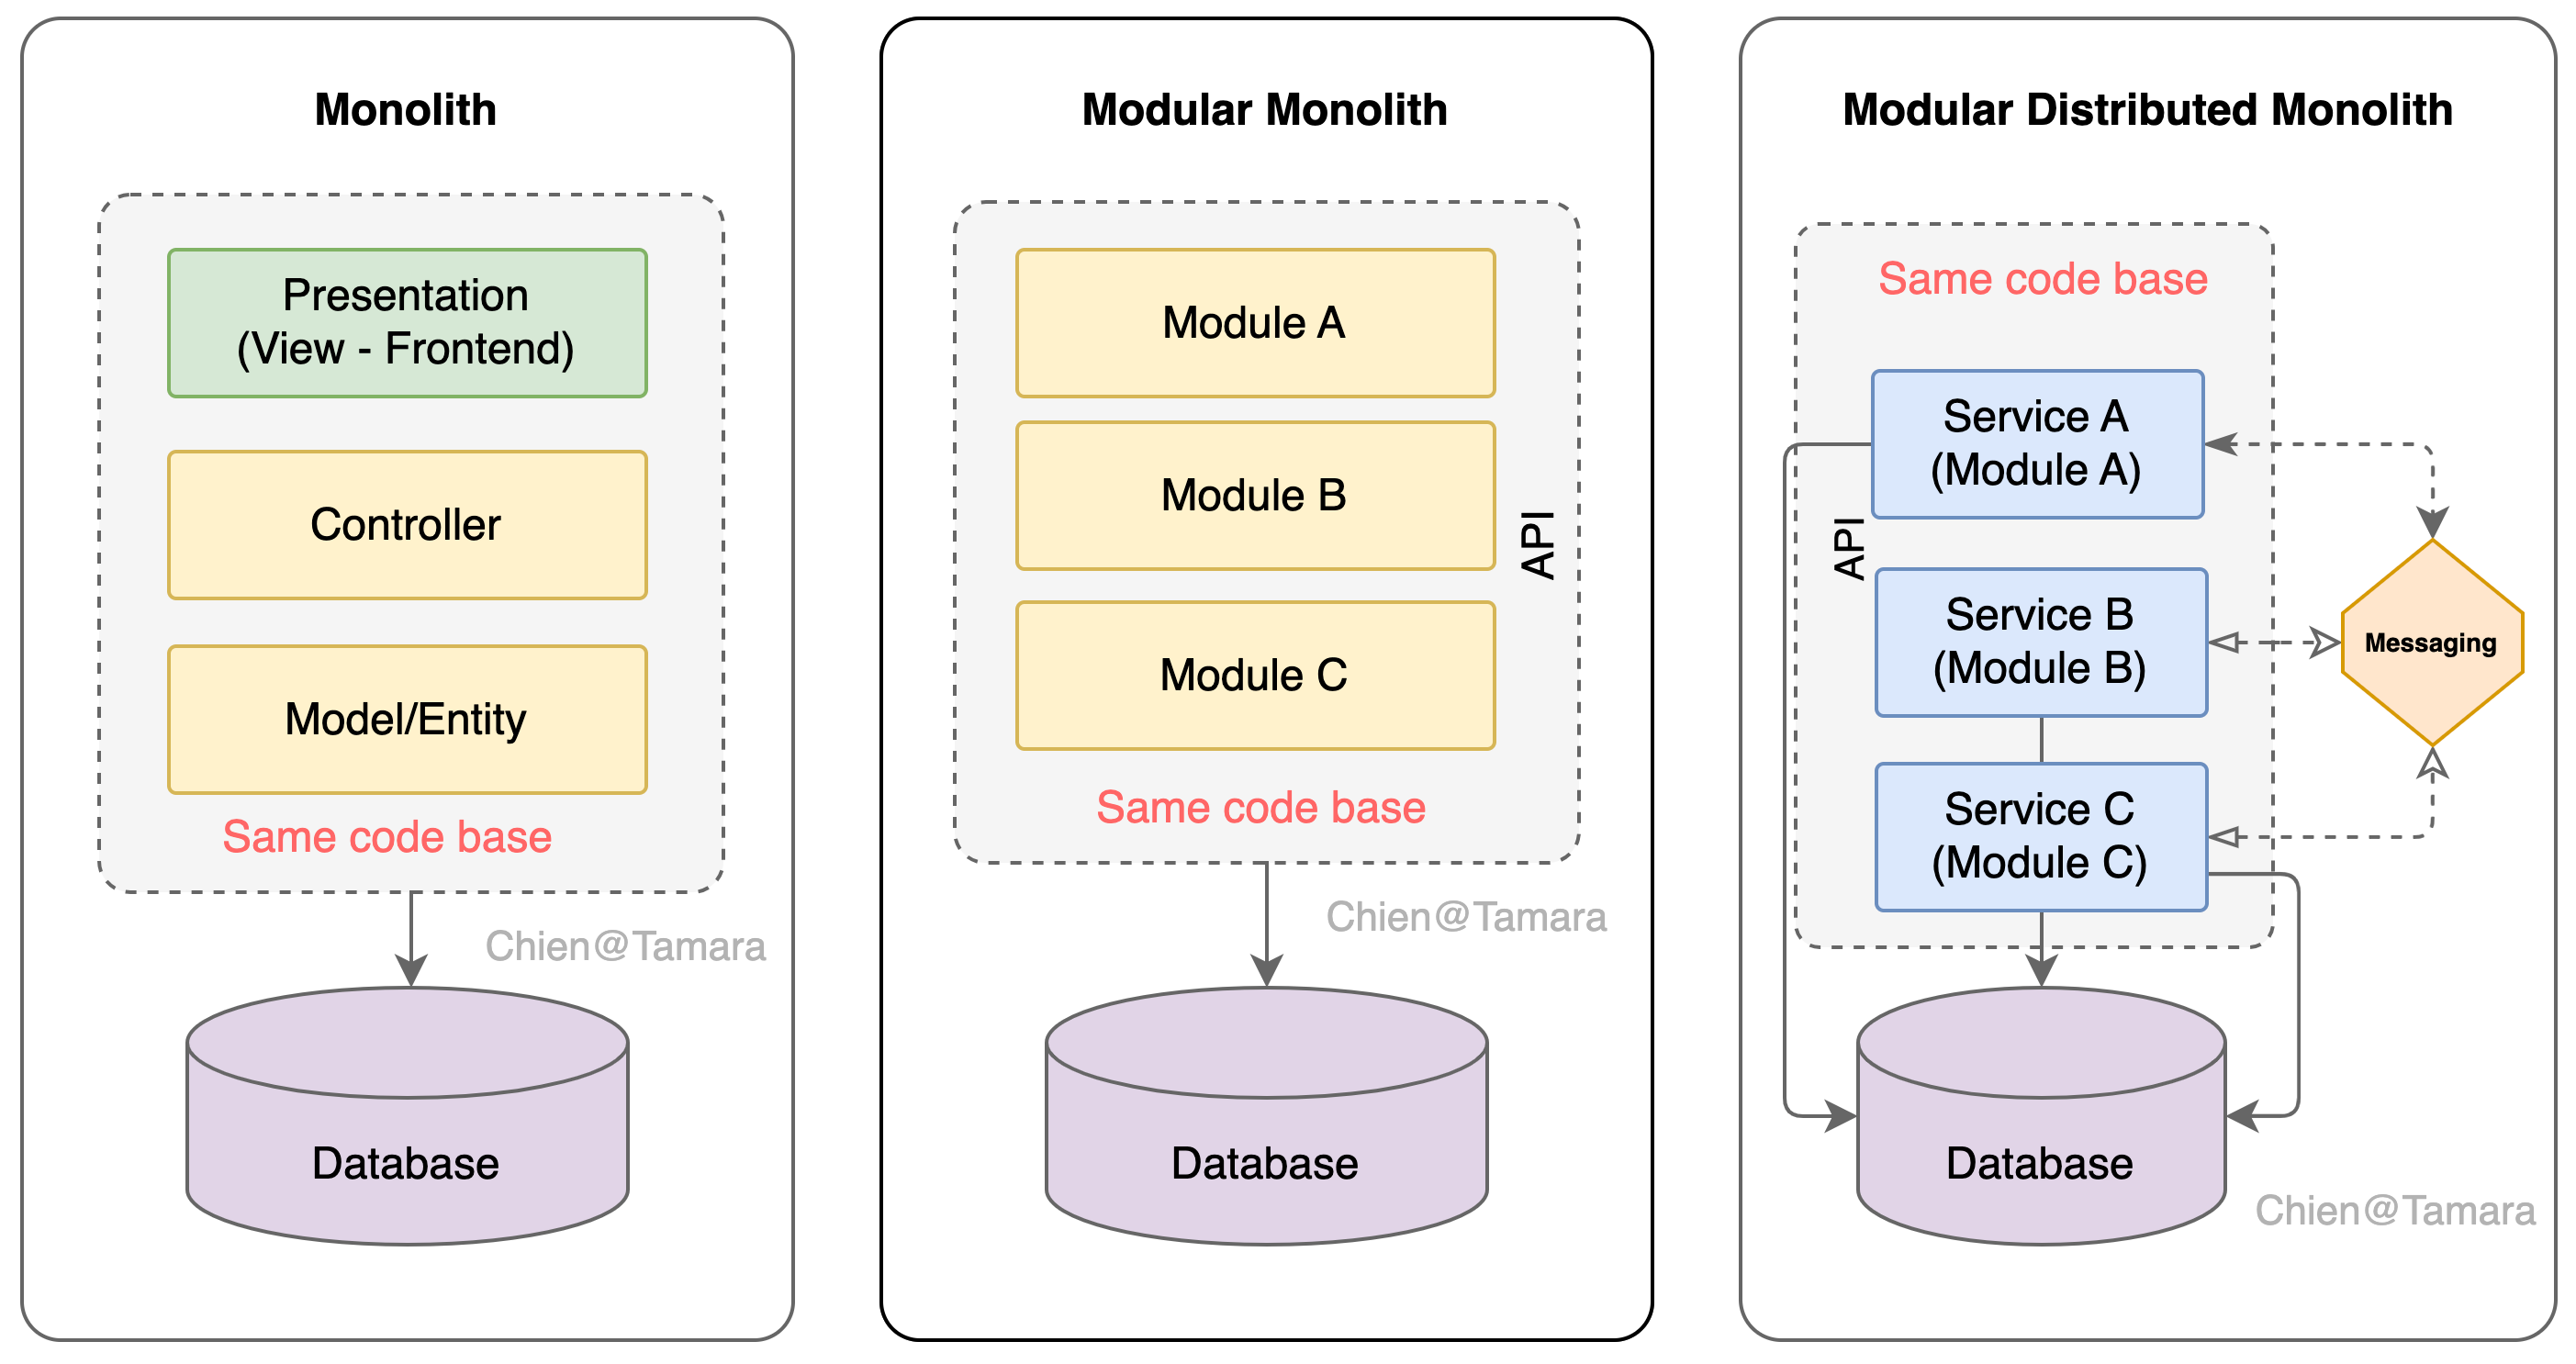

## What it is
- Entire system runs on one machine
- One database, one CPU (or tightly coupled CPUs), one storage
- Vertical scaling: bigger machine = more power

## Typical Stack

- Single SQL Server / Oracle DB
- Python / Pandas / R
- Traditional ETL tools
- On-prem data warehouses

**How data is handled**<br>
Data → Single Server → Processing → Output<br>

## Pros

- ✅ Simple architecture
- ✅ Easy to develop & debug
- ✅ Strong consistency
- ✅ Low operational complexity

## Cons

- ❌ Limited scalability (hardware ceiling)
- ❌ Single point of failure
- ❌ Very expensive to scale vertically
- ❌ Poor performance for TB+ data

## Best suited for

- Small to medium datasets (MBs → few GBs)
- Low concurrency
- Simple analytics
- Early-stage systems

---

## 2️⃣ Distributed Approach (Big Data Architecture)

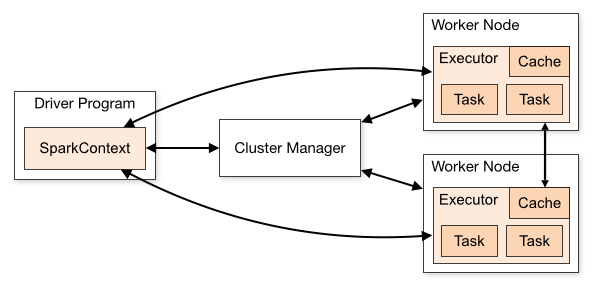

## What it is
- Data & computation spread across many machines
- Horizontal scaling: add more nodes
- Built for failure (nodes will fail)

## Typical Stack
- Distributed storage (HDFS, Object Storage)
- Distributed compute (Spark, Flink)
- Message systems (Kafka, Event Hub)
- Cloud-native services

**How data is handled**<br>
Data → Split into chunks → Multiple nodes process in parallel → Aggregated output

## Pros

- ✅ Massive scalability (TB → PB)
- ✅ Fault tolerant
- ✅ High throughput
- ✅ Cost-effective (commodity hardware / cloud)

## Cons

- ❌ Higher complexity
- ❌ Network overhead
- ❌ Eventual consistency models
- ❌ Debugging is harder

## Best suited for
- Big data analytics
- Streaming data
- Machine learning
- IoT, logs, telemetry
- Enterprise & cloud systems

# 🌟 Is Apache Spark the only Big Data processing engine that we have ?<br>Scenario before Apache Spark

---

## **🆚 Apache Spark vs MapReduce (Big Data Processing)**

For More info on **Introduction to Bigdata and Hadoop Ecosystem** visit:<br>
https://data-flair.training/blogs/hadoop-ecosystem-components/<br>
https://faun.pub/introduction-to-bigdata-and-hadoop-ecosystem-1929e59924cf

**What is HDFS ?**<br>
> Hadoop Distributed File System (HDFS) is a highly fault-tolerant, open-source distributed storage system designed to manage massive datasets (petabytes) across clusters of low-cost, commodity hardware.<p>It uses a master/slave architecture—consisting of a NameNode (metadata) and DataNodes (block storage)—to provide high throughput, data replication, and high availability.<p>
**Note: HDFS is the foundational storage layer for the Apache Hadoop ecosystem, widely used for Big Data analytics, AI, and machine learning workloads.**

## Key Aspects of HDFS

### Architecture
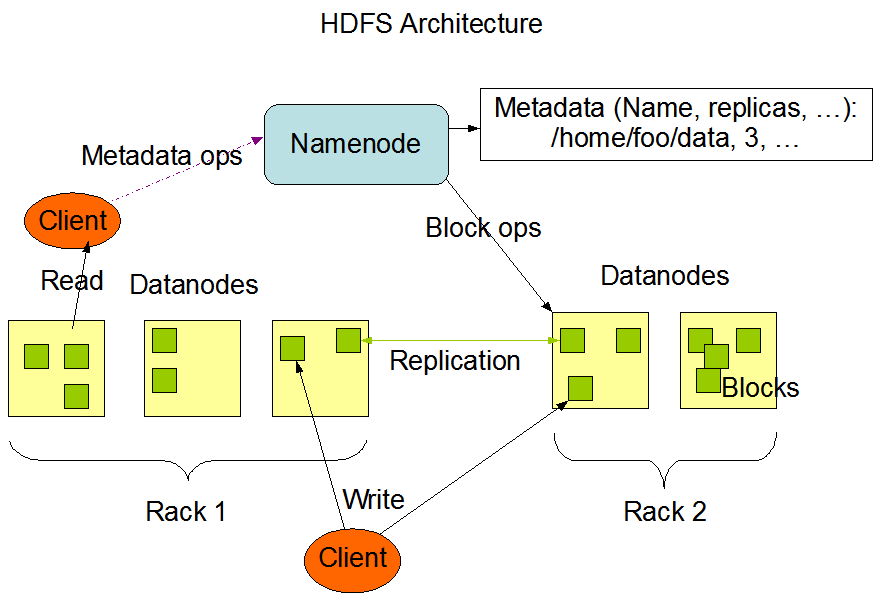
- HDFS divides large files into smaller blocks (default 128 MB)  
- Replicates blocks across multiple nodes to prevent data loss (default: 3 replicas, each at different Data Node.)

### HDFS Blocks

In HDFS, a **block** is the smallest unit of data that the file system can store or process.  
Instead of storing a massive 10 GB file as one giant piece, HDFS chops it into smaller, uniform chunks.

---

### Why Use Blocks?

- **Parallel Processing:**  
  Since a file is split into many blocks, different servers (DataNodes) can process different parts of the same file simultaneously, drastically speeding up big data tasks.

- **Fault Tolerance:**  
  Each block is copied (replicated) to multiple servers (usually 3). If one server crashes, the system retrieves a copy of the block from another server.

- **Scalability:**  
  A single file can be larger than any individual hard drive in the cluster because its blocks can be distributed across hundreds of different disk


### Components
- **NameNode:**  
  The master node that manages the file system namespace, maintains the file system tree, and tracks metadata for files.  

  ## **NameNode Function FsImage, EditLog and Other HDFS Metadata Files (Explained Simply)**

  ---

  ### FsImage

  FsImage is a snapshot of the HDFS file system metadata at a point in time.

  It contains:
  - Directory structure  
  - File names  
  - Permissions  
  - Block mappings (file → block IDs)  

  📌 **FsImage does NOT store actual data — only metadata.**

  Think of it as:  
  > A photograph of the HDFS namespace.

  ---

  ### EditLog

  EditLog records every change made to HDFS after the FsImage was created.

  Examples:
  - Create file  
  - Delete file  
  - Rename file  
  - Change permissions  

  Why it exists:
  - Writing to FsImage every time would be slow  
  - EditLog lets NameNode log changes efficiently  

  Think of it as:  
  > A transaction log.

  ---

  ### How FsImage + EditLog Work Together

  - NameNode loads FsImage  
  - Replays EditLog on top of it  
  - Reconstructs the latest HDFS state in memory  

  Without EditLog → **data loss**  
  Without FsImage → **slow startup**

  ---

  ### Secondary NameNode (Important!)

  Despite the name, it is **NOT** a backup NameNode.

  What it does:
  - Periodically fetches FsImage and EditLog  
  - Merges them into a new FsImage  
  - Sends the compacted FsImage back  

  Purpose:
  - Prevents EditLog from growing too large  
  - Reduces NameNode restart time  

  ---

  ### Checkpoint Node / Standby NameNode

  In modern Hadoop:
  - Checkpoint Node or Standby NameNode replaces Secondary NameNode  
  - Provides high availability  
  - Keeps metadata in sync using ZooKeeper  

  ---

  ### Interview-Ready Summary

  - **FsImage:** Snapshot of HDFS metadata  
  - **EditLog:** Record of metadata changes  
  - **Secondary NameNode:** Merges FsImage and EditLog  
  - **Standby NameNode:** High availability and failover  

  ---
  ### Heartbeats and Block Reports in HDFS

  The NameNode regularly receives **heartbeats** and **block reports** from all DataNodes to ensure they are alive and to maintain accurate metadata about block locations.

  ---

  ### Heartbeat
  - Sent frequently (every ~3 seconds by default)  
  - Tells the NameNode:  
    > “I am alive and functioning”  
  - If heartbeats stop for a threshold time, the DataNode is marked **dead**

  ---

  ### Block Report
  - Sent less frequently (about once per hour by default)  
  - Contains:  
    - List of all blocks stored on that DataNode  
  - Used by the NameNode to:  
    - Track block locations  
    - Detect under-replicated or over-replicated blocks  
  ---

- **DataNodes:**  
  Slave nodes that store actual data blocks and perform block creation, deletion, and replication upon instructions from the NameNode.

  ## **DataNode Functions and HDFS Read/Write Process**

  ### Main Functions of DataNode
  - **Store Blocks:** Stores actual data blocks on local disks.  
  - **Serve Client Requests:** Reads and writes blocks for clients.  
  - **Heartbeat:** Sends regular heartbeats to the NameNode to indicate it is alive.  
  - **Block Report:** Periodically sends a list of all stored blocks to the NameNode.  
  - **Block Replication:** Replicates blocks to other DataNodes when instructed by the NameNode.  
  - **Block Deletion:** Deletes blocks when files are removed or over-replicated.  
  - **Data Integrity:** Maintains checksums for blocks to detect corruption.  

  ### **HDFS Write Process (Client → HDFS)**
  1. Client contacts the **NameNode** for block allocation.  
  2. NameNode returns a list of **DataNodes** where each block will be stored (default 3 replicas).  
  3. Client splits the file into blocks and sends each block to the **first DataNode**.  
  4. The first DataNode writes the block and pipelines it to the **second DataNode**, which then pipelines to the **third DataNode**.  
  5. Each DataNode sends an **acknowledgement** back along the pipeline to the client.  
  6. Once all blocks are written and acknowledged, the write is complete.

  **Write Pipeline Diagram:**<br>

  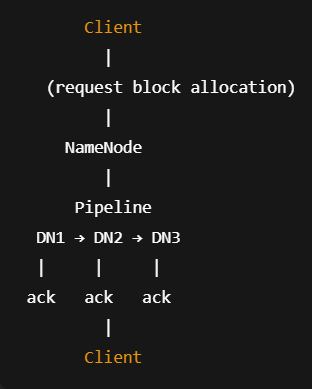

  **Explanation:**

  - Client asks NameNode for block locations.
  - NameNode chooses three DataNodes (DN1, DN2, DN3).
  - Client sends block to DN1 → pipelined to DN2 → pipelined to DN3.
  - Each DataNode sends acknowledgment back to client.
  
  ---

  ### **HDFS Read Process (Client ← HDFS)**
  1. Client contacts **NameNode** to get the block locations for the file.  
  2. NameNode returns the list of DataNodes storing each block.  
  3. Client reads blocks **directly from the nearest DataNode** to optimize network usage.  
  4. If a DataNode is down, the client automatically reads the block from the next replica.

  **Read diagram (text-based):**<br>

  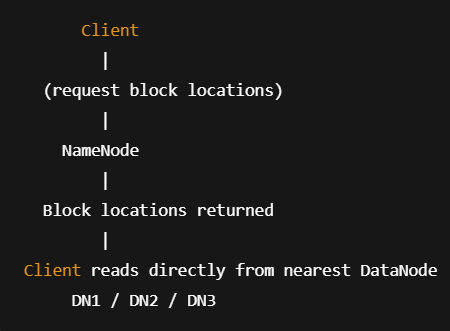
  
  **Explanation:**

  - Client asks NameNode where the blocks are.
  - NameNode returns DataNode locations.
  - Client reads blocks from the closest or fastest replica.


### Key Features
- **Fault Tolerance:** Automatic recovery from node failures through data replication  
- **High Throughput:** Designed for streaming data access rather than low-latency random access  
- **Scalability:** Can be scaled to thousands of nodes, holding petabytes of data  

### Commands
- Similar to Linux commands, using `hdfs dfs` or `hadoop fs` for file management (e.g., `ls`, `put`, `get`)


## 1️⃣ What is MapReduce?
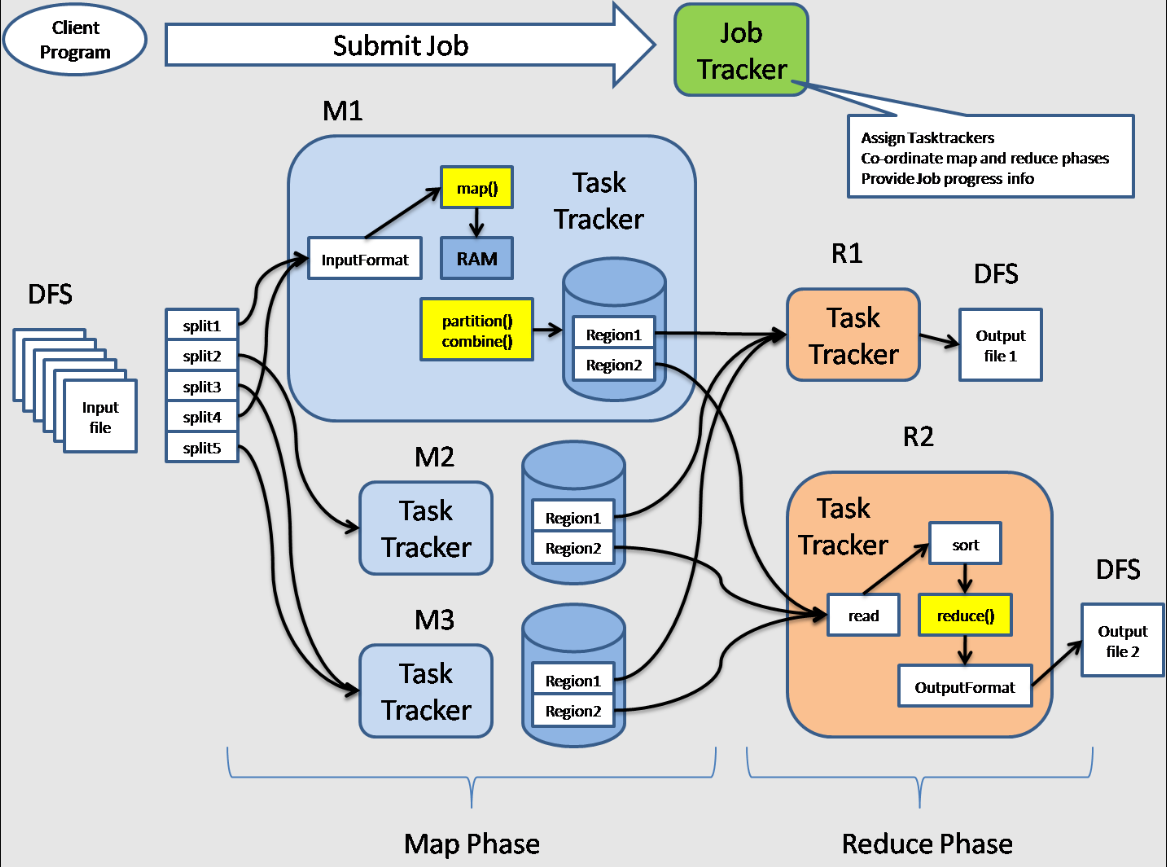

Apache Hadoop MapReduce is the original distributed processing model designed to process huge datasets by breaking work into two rigid phases:
- Map – process input data
- Reduce – aggregate results

**How it works**<br>
Input → Map → Disk → Shuffle → Disk → Reduce → Output<br>

⚠️ *Every step writes to disk*

## Execution Model

**MapReduce (Rigid & Linear)**

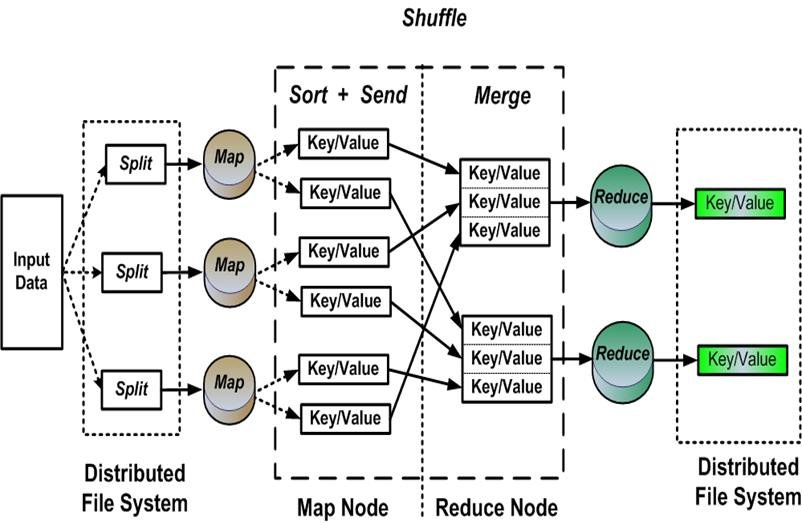
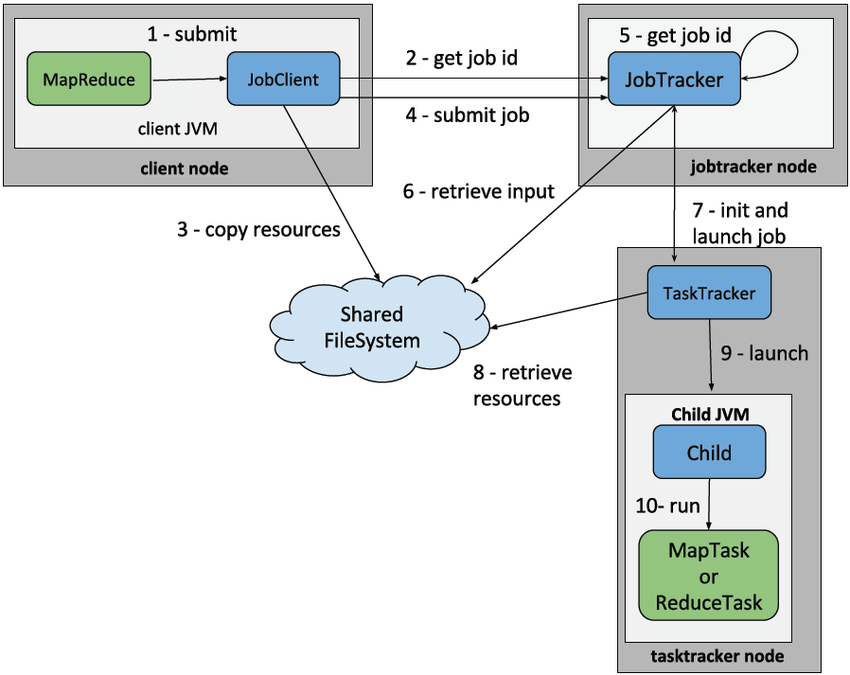

- Only 2 stages
- No optimization across stages
- Intermediate results → disk → network → disk

## Programming Experience

**MapReduce (Java-heavy 😓)**
```JAVA
public class WordCountMapper extends Mapper<LongWritable, Text, Text, IntWritable> {
    public void map(LongWritable key, Text value, Context context) {
        // boilerplate-heavy
    }
}
```

## 2️⃣ What is Apache Spark?
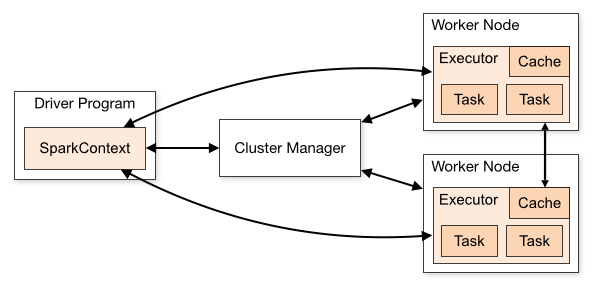

Apache Spark is a general-purpose distributed computing engine designed for speed, flexibility, and advanced analytics.

**How it works**<br>
Input → In-Memory Processing → DAG Execution → Output<br>

🔥 *Data stays in memory whenever possible*

## Execution Model

**Spark (Flexible DAG)**

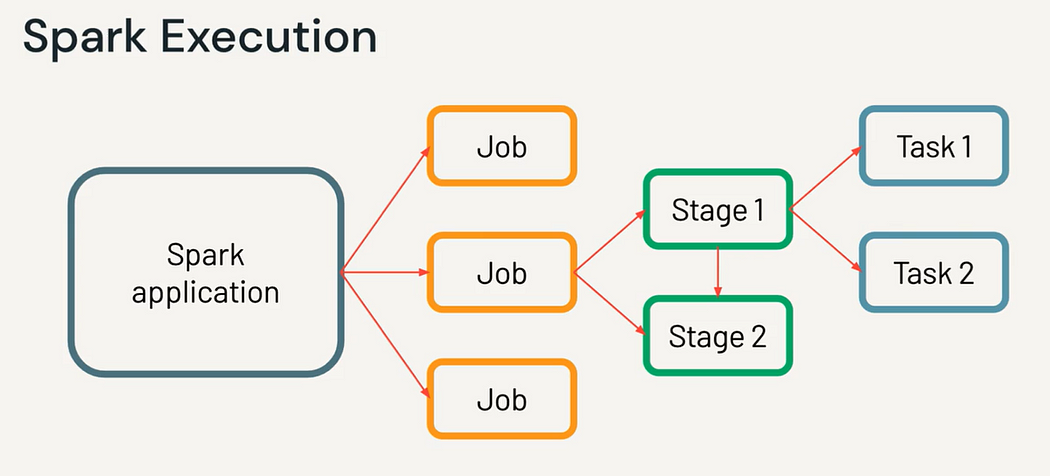
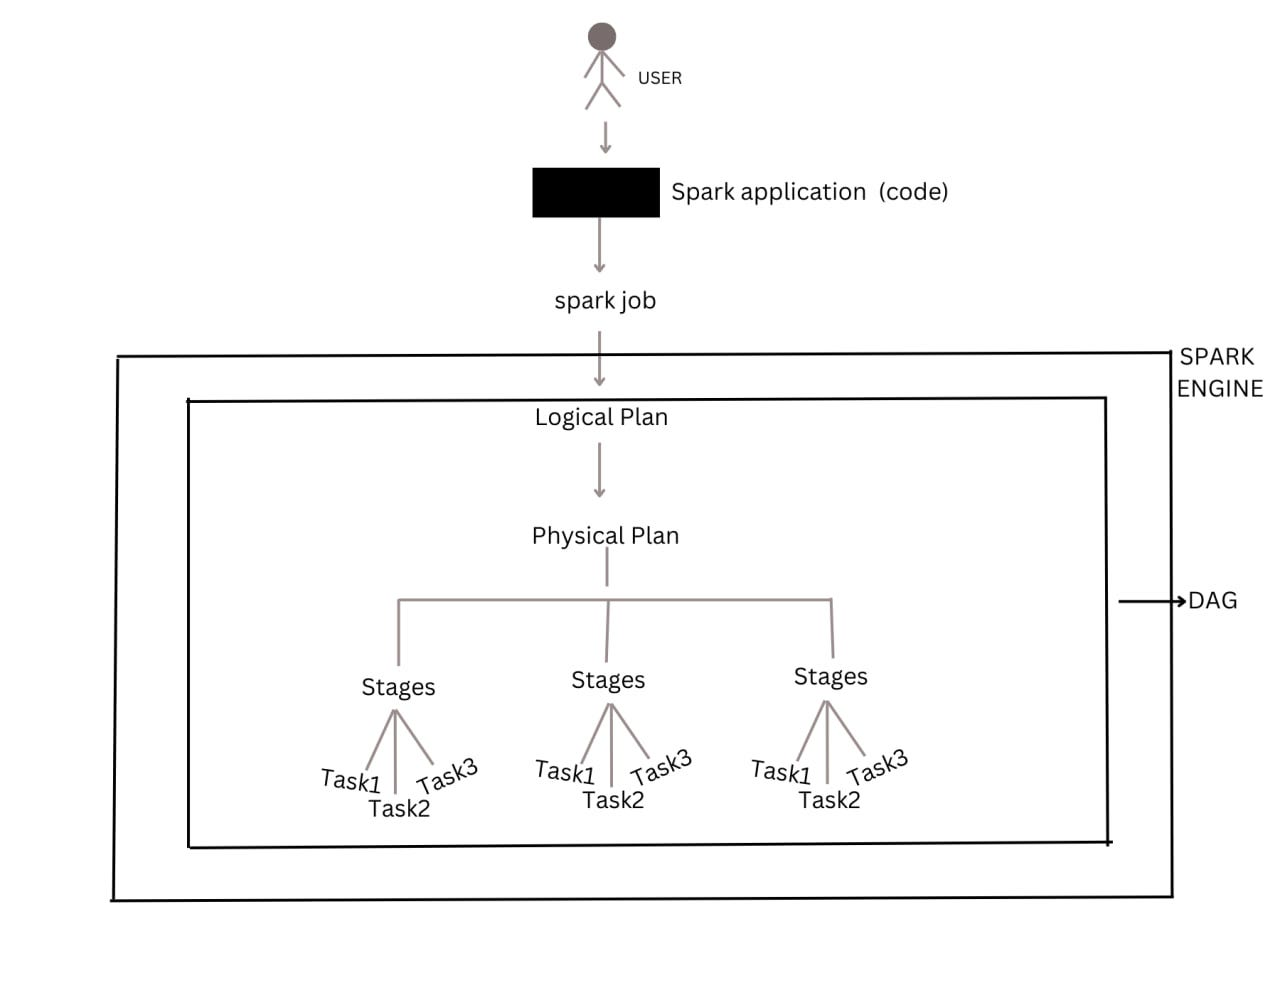

- Directed Acyclic Graph (DAG)
- Optimizes entire job before execution
- Keeps data in memory

## Programming Experience

**Spark (Python-friendly 😍)**
```Python
df.groupBy("word").count()
```

### 3️⃣ Core Difference (At a Glance)

| Aspect            | MapReduce        | Spark                          |
|-------------------|------------------|--------------------------------|
| Processing Model  | Map → Reduce only| DAG (multiple stages)          |
| Data Handling     | Disk-based       | In-memory                      |
| Speed             | Slow             | ⚡ 10–100× faster               |
| Iterative Jobs    | Very inefficient | Highly efficient               |
| Code Complexity   | High             | Simple & expressive            |
| APIs              | Java-heavy       | SQL, Python, Scala, R          |
| Use Cases         | Batch only       | Batch + Streaming + ML         |


## 4️⃣ Performance Comparison
| Scenario                | Winner     | Why                     |
|-------------------------|------------|--------------------------|
| Simple batch job        | Spark      | Less disk I/O            |
| Iterative algorithms    | Spark      | In-memory reuse          |
| Machine Learning        | Spark      | Native MLlib             |
| Streaming               | Spark      | Structured Streaming     |
| Legacy Hadoop cluster   | MapReduce  | Already exists           |


### 5️⃣ Fault Tolerance (Different Philosophy)

**MapReduce**  
- Relies on disk replication (HDFS)  
- Restarts failed tasks from disk  

**Spark**  
- Uses RDD lineage  
- Recomputes lost partitions instead of disk reads  

👉 *Spark is smarter, MapReduce is simpler*

---

### 6️⃣ Ecosystem Support

**MapReduce**  
- Pig  
- Hive (originally MapReduce-based)  

**Spark**  
- Spark SQL  
- Spark Streaming  
- MLlib  
- GraphX  
- Delta Lake (Databricks)  

📉 *That’s why MapReduce usage has drastically declined*

---

### 7️⃣ When Would You Still Use MapReduce?

Rare, but possible:  
- Legacy Hadoop pipelines  
- Extremely simple batch jobs  
- Disk-heavy compliance workflows  
- Very limited memory environments  

👉 *New projects? Almost never.*


# 📦 MapReduce — Complete Detailed Guide

---

## 1️⃣ What is MapReduce?

**MapReduce** is a distributed programming model and processing framework used within the Apache Hadoop ecosystem to process vast amounts of data in parallel across large clusters of commodity hardware.<p>It achieves high scalability and fault tolerance by breaking down large datasets into smaller chunks and processing them in two main phases: Map and Reduce. 

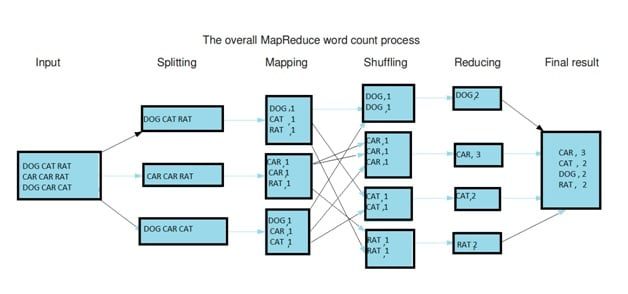

### Core Idea

> Break a large dataset into smaller chunks, process them in parallel, and combine the results.

---

## 2️⃣ Why MapReduce Was Needed

### Before MapReduce

* Single machine processing
* Limited CPU, memory, and storage
* No fault tolerance
* Scaling required expensive hardware upgrades

### With MapReduce

* Data split across multiple machines
* Parallel execution
* Automatic fault tolerance
* Horizontal scalability

---

## 3️⃣ High-Level Architecture

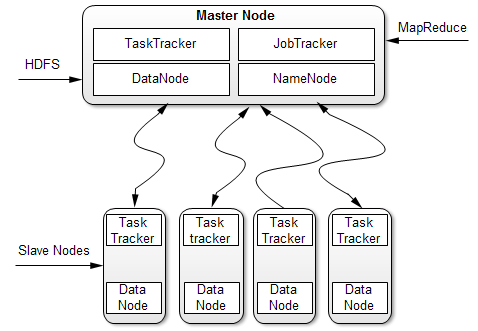

Main Components:

| Component                    | Description                                          |
| ---------------------------- | ---------------------------------------------------- |
| HDFS                         | Distributed file system storing data in blocks       |
| Mapper                       | Processes input splits and generates key-value pairs |
| Reducer                      | Aggregates mapped output                             |
| YARN                         | Resource management layer                            |
| ResourceManager / JobTracker | Coordinates job execution                            |

---

## 4️⃣ End-to-End Processing Flow

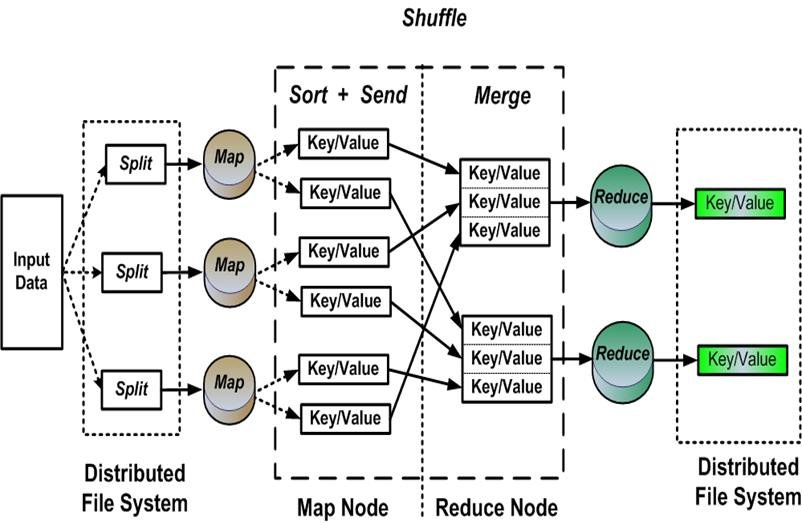

```
Input Data
   ↓
Input Split
   ↓
Mapper
   ↓
Shuffle & Sort
   ↓
Reducer
   ↓
Final Output
```

---

## 5️⃣ Step 1: Input Data & Splitting

* Data stored in HDFS
* Files split into blocks (default 128 MB)
* Each block processed by one Map task

> Note: A split is a logical division, while a block is physical storage in HDFS.

---

## 6️⃣ Step 2: Mapper Phase

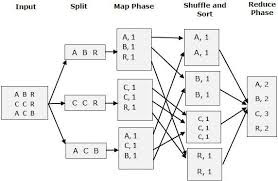

The Mapper:

* Reads input split
* Converts raw data into key-value pairs
* Runs independently and in parallel

### Example: Word Count

#### Input

```
Big data is powerful
Big data is scalable
```

#### Mapper Output

```
(Big, 1)
(data, 1)
(is, 1)
(powerful, 1)
(Big, 1)
(data, 1)
(is, 1)
(scalable, 1)
```

Characteristics:

* Stateless
* Parallel execution
* No communication between mappers

---

## 7️⃣ Step 3: Shuffle & Sort (Core Phase)

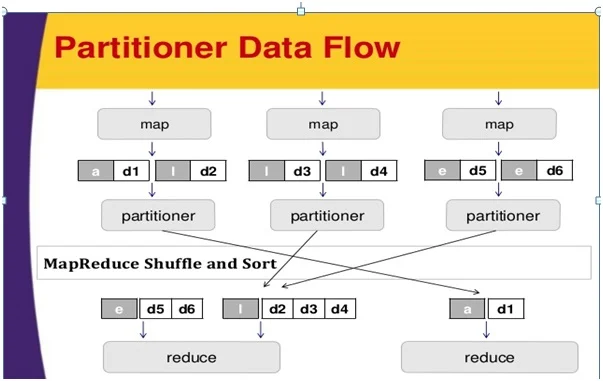

This phase:

1. Writes mapper output to local disk
2. Groups records by key
3. Transfers grouped keys to appropriate reducers
4. Sorts keys

### Example After Shuffle

```
Big → [1, 1]
data → [1, 1]
is → [1, 1]
powerful → [1]
scalable → [1]
```

This stage involves heavy:

* Disk I/O
* Network transfer
* Sorting overhead

---

## 8️⃣ Step 4: Reducer Phase

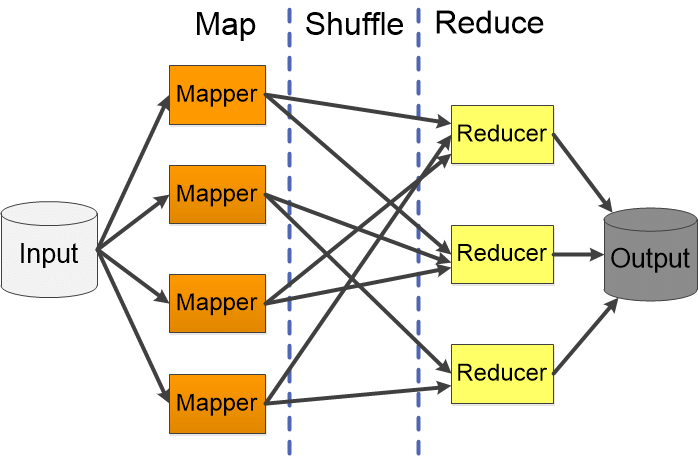

Reducer:

* Takes key + list of values
* Performs aggregation
* Writes final output to HDFS

### Example Output

```
(Big, [1,1]) → (Big, 2)
(data, [1,1]) → (data, 2)
(is, [1,1]) → (is, 2)
(powerful, [1]) → (powerful, 1)
(scalable, [1]) → (scalable, 1)
```

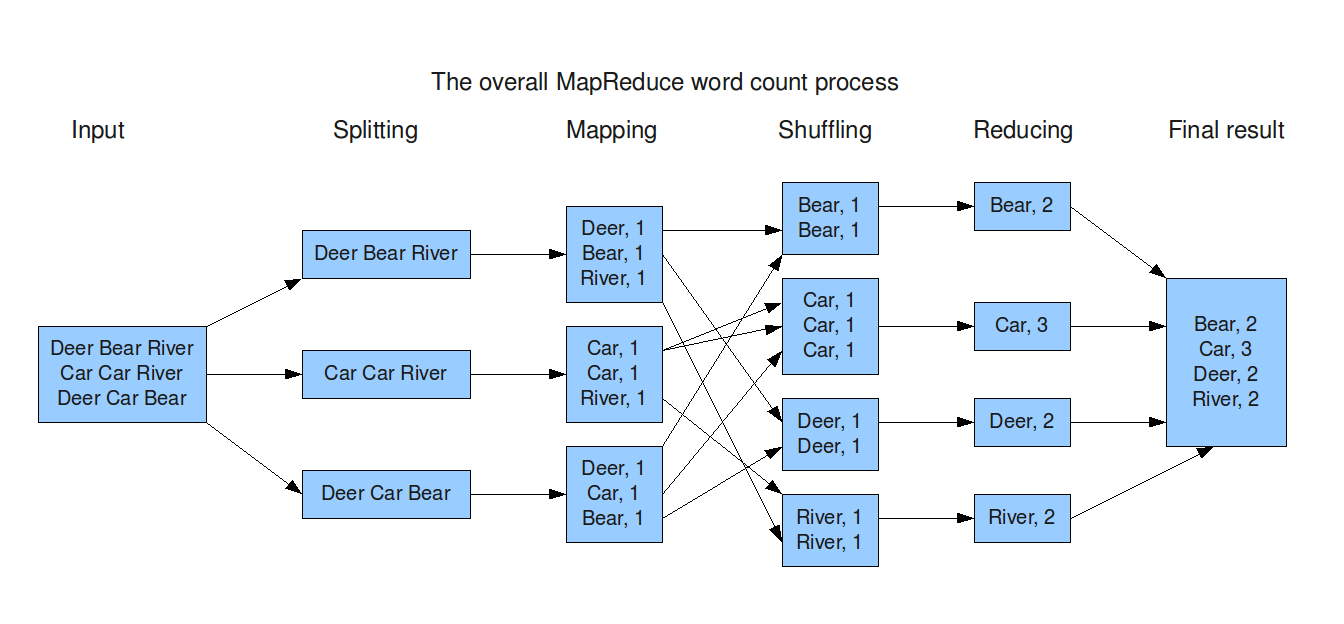

---

## 9️⃣ Disk-Based Nature

MapReduce writes to disk multiple times:

**Disk writes happen at:**

- Mapper output
- Shuffle phase
- Reducer output

```
Map → Disk → Network → Disk → Reduce → Disk
```

This ensures reliability but reduces performance.

---

## 🔟 Fault Tolerance

MapReduce handles failures by:

* Re-executing failed tasks on other nodes
* Using HDFS replication for data safety
* Master node tracking task status

Reliable but slower recovery compared to modern systems.

---

## 1️⃣1️⃣ Programming Model (Why Devs Hated It 😅)

Characteristics:

* Mostly Java-based
* High boilerplate code
* Rigid two-stage model (Map → Reduce)
* Not suitable for iterative processing

### Pseudocode Structure

```
map(key, value):
    emit(intermediate_key, intermediate_value)

reduce(key, list_of_values):
    aggregate values
    emit(final_key, final_value)
```

---

## 1️⃣2️⃣ Strengths

* Handles massive datasets
* Strong fault tolerance
* Deterministic batch jobs
* Works on commodity hardware

---

## 1️⃣3️⃣ Limitations

* Heavy disk dependency
* Slow for iterative algorithms
* Complex development
* Batch processing only
* No native streaming support

---

## 1️⃣4️⃣ When to Use MapReduce

Use when:

* Legacy Hadoop cluster exists
* Large batch jobs required
* Memory resources are limited

Avoid for:

* Real-time analytics
* Machine learning workloads
* Streaming systems

---

## 1️⃣5️⃣ Conceptual Summary

| Feature          | MapReduce              |
| ---------------- | ---------------------- |
| Processing Model | Map → Shuffle → Reduce |
| Storage          | Disk-based             |
| Speed            | Slower                 |
| Scalability      | Horizontal             |
| Fault Tolerance  | High                   |
| Use Case         | Batch processing       |

---

## 🎯 Final Understanding

MapReduce is the foundation of distributed batch processing.

It introduced:

* Parallel data processing
* Data locality
* Automatic fault tolerance
* Horizontal scaling

While modern systems (like Spark) improved performance by using in-memory processing and DAG execution, the core distributed computing principles originated from MapReduce.

---

# End of Document


# 🏗 Hadoop MapReduce Internal Architecture — Deep Conceptual Guide

MapReduce runs inside the Hadoop ecosystem. Over time, Hadoop evolved from **Hadoop 1.x (JobTracker model)** to **Hadoop 2.x+ (YARN architecture)** to improve scalability, flexibility, and fault tolerance.

There are two major architectures:

* **Hadoop 1.x** → JobTracker & TaskTracker
* **Hadoop 2.x+** → YARN (ResourceManager & NodeManager)

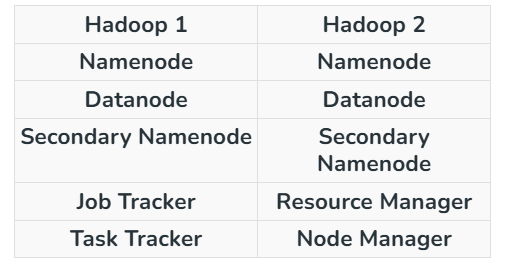

---

# 🧠 Big Picture — Layered Architecture

```
+--------------------------------------------------+
|                Hadoop Ecosystem                  |
+--------------------------------------------------+
|                                                  |
|   +-------------------+     +-----------------+  |
|   |       HDFS        |     |      YARN       |  |
|   | (Storage Layer)   |     | (Cluster Mgmt)  |  |
|   +-------------------+     +-----------------+  |
|                                      |            |
|                         -------------------------  |
|                         |          |           |   |
|                   ResourceManager NodeManager  AM  |
|                                                  |
+--------------------------------------------------+
```

## 🔹 Important Understanding

* **HDFS** → Storage Layer
* **YARN** → Resource Management Layer
* **MapReduce / Spark / Tez** → Applications running on YARN

👉 ResourceManager and NodeManager belong to **YARN**, not directly to MapReduce.

---

# 1️⃣ Hadoop 1.x Architecture (Classic MapReduce)

In Hadoop 1.x, resource management and job execution were tightly coupled.

## 🏗 Architecture Diagram — Hadoop 1.x

```
                    +-------------------+
                    |     Client        |
                    +---------+---------+
                              |
                              v
                    +-------------------+
                    |    JobTracker     |
                    |   (Master Node)   |
                    +---------+---------+
                              |
        -----------------------------------------------
        |                     |                       |
        v                     v                       v
+---------------+     +---------------+       +---------------+
| TaskTracker 1 |     | TaskTracker 2 |  ...  | TaskTracker N |
| (Worker Node) |     | (Worker Node) |       | (Worker Node) |
+-------+-------+     +-------+-------+       +-------+-------+
        |                     |                       |
        v                     v                       v
   Map / Reduce          Map / Reduce           Map / Reduce
      Tasks                 Tasks                  Tasks

(All nodes read/write data from HDFS)
```

## 🔹 JobTracker (Master Node)

The **JobTracker** was the central authority of the cluster.

### Responsibilities

* Accept MapReduce jobs from clients
* Divide jobs into Map and Reduce tasks
* Schedule tasks on TaskTrackers
* Monitor task progress
* Restart failed tasks
* Maintain job metadata

### Characteristics

* Single point of failure ❌
* High memory load
* Limited scalability

If the JobTracker crashed → the entire cluster stopped.

---

## 🔹 TaskTracker (Worker Node)

Each worker machine ran a **TaskTracker**.

### Responsibilities

* Execute Map tasks
* Execute Reduce tasks
* Send heartbeats to JobTracker
* Report task progress

### Slot-Based Execution Model

Each TaskTracker had fixed:

* Map slots
* Reduce slots

This caused inefficient resource utilization because CPU and memory were not dynamically allocated.

---

# 2️⃣ Hadoop 2.x+ Architecture (YARN — Yet Another Resource Negotiator)

To overcome Hadoop 1.x limitations, **YARN** was introduced.

## 🏗 Architecture Diagram — Hadoop 2.x (YARN)

```
                     +-------------------+
                     |      Client       |
                     +---------+---------+
                               |
                               v
                     +-------------------+
                     |  ResourceManager  |
                     |   (Cluster Master)|
                     +---------+---------+
                               |
                ---------------------------------
                |                               |
                v                               v
     +-------------------+           +-------------------+
     | ApplicationMaster |           |  NodeManager 1    |
     |  (Per Application)|           |  (Worker Node)    |
     +---------+---------+           +---------+---------+
               |                               |
               |                               v
               |                        +---------------+
               |                        |  Containers   |
               |                        | (Map/Reduce)  |
               |                        +---------------+
               |
               v
     +-------------------+
     |  NodeManager N    |
     +---------+---------+
               |
               v
        +---------------+
        |  Containers   |
        +---------------+

(All containers read/write data from HDFS)
```
---

YARN separates:

* Resource management
* Job scheduling and execution

---

# 🔹 Where Do ResourceManager & NodeManager Belong?

They belong under:

# ✅ YARN (Resource Management Layer)

Hierarchy:

```
Hadoop
   ├── HDFS
   └── YARN
         ├── ResourceManager
         │      └── Scheduler
         ├── NodeManager
         ├── ApplicationMaster
         └── Containers
```

---

## 🔹 ResourceManager (Cluster-Level Master)

The **ResourceManager (RM)** manages cluster-wide resources.

### Responsibilities

* Allocate CPU and memory resources
* Schedule applications
* Enforce scheduling policies (FIFO, Capacity, Fair Scheduler)

It does NOT execute tasks directly.

### Internal Components

1. **Scheduler** — Allocates containers based on policies
2. **ApplicationsManager** — Manages application lifecycle

---

## 🔹 NodeManager (Worker-Level Agent)

Each worker machine runs a **NodeManager (NM)**.

### Responsibilities

* Launch containers
* Monitor resource usage
* Report health to ResourceManager
* Manage logs

---

## 🔹 ApplicationMaster (Per-Application Controller)

For every submitted job, YARN launches a dedicated **ApplicationMaster (AM)**.

### Responsibilities

* Negotiate resources with ResourceManager
* Request containers for tasks
* Coordinate execution of Map and Reduce tasks
* Handle task failures
* Monitor job progress

This removes the single point of failure issue present in Hadoop 1.x.

---

# 📦 Container Concept (Very Important)

In YARN, resources are allocated as **containers**.

A container is:

* A bundle of CPU + Memory
* Dynamically allocated
* Used to run tasks

Unlike fixed slots in Hadoop 1.x, containers allow better cluster utilization and flexibility.

---

# 🧠 Conceptual Execution Flow in YARN

```
1. Client submits job
2. ResourceManager allocates container for ApplicationMaster
3. ApplicationMaster starts
4. ApplicationMaster requests containers for tasks
5. NodeManagers execute Map & Reduce tasks inside containers
6. Tasks report progress back to ApplicationMaster
7. Final output written to HDFS
```

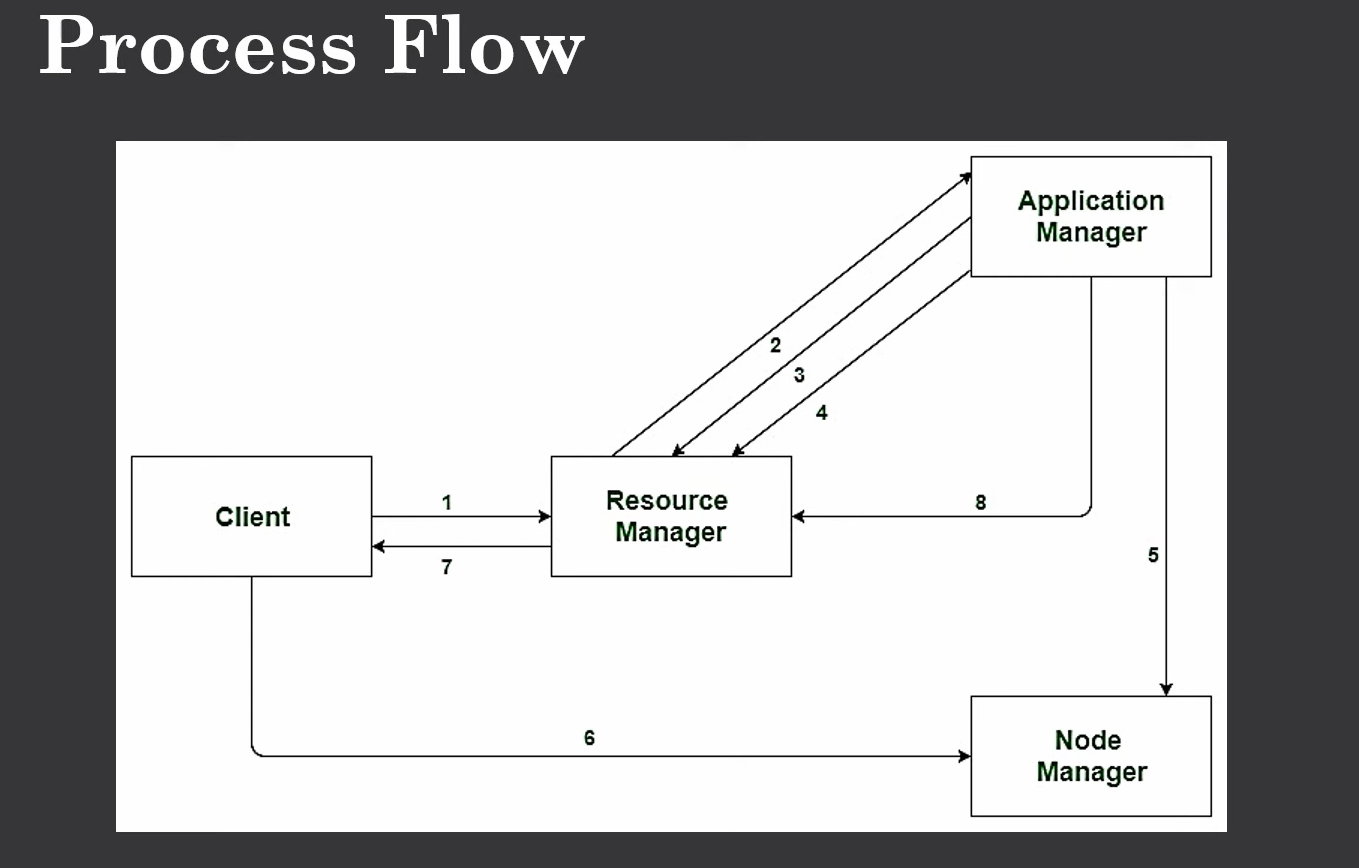 <p>

## ** 🏗 Simple YARN Architecture Diagram**

```
                    +------------------+
                    |      Client      |
                    +--------+---------+
                             |
                             v
                    +------------------+
                    | ResourceManager  |
                    |   (Cluster Boss) |
                    +--------+---------+
                             |
              ---------------------------------
              |                               |
              v                               v
     +----------------+              +----------------+
     | NodeManager 1  |              | NodeManager 2  |
     | (Worker Node)  |              | (Worker Node)  |
     +--------+-------+              +--------+-------+
              |                               |
              |                               |
      +-------+-------+               +-------+-------+
      |  Container    |               |  Container    |
      | (Task Runs)   |               | (Task Runs)   |
      +-------+-------+               +-------+-------+
              |                               |
              |                               |
        +-------------+                +-------------+
        | Map Task    |                | Reduce Task |
        +-------------+                +-------------+

        (ApplicationMaster runs inside one container)

```
**👉 ApplicationMaster should logically appear above NodeManagers in the control flow.**

But…

**👉 Physically, it actually runs inside a container on one of the NodeManagers.**


**Because:**

- ApplicationMaster is launched inside a container
- That container runs on a NodeManager


## Physical Deployment View (Where It Actually Runs)

```
NodeManager 1
   ├── Container (ApplicationMaster)
   ├── Container (Map Task)

NodeManager 2
   ├── Container (Reduce Task)
```

---

# 📊 Hadoop 1.x vs Hadoop 2.x Comparison

| Feature                 | Hadoop 1.x   | Hadoop 2.x (YARN) |
| ----------------------- | ------------ | ----------------- |
| Master Component        | JobTracker   | ResourceManager   |
| Worker Component        | TaskTracker  | NodeManager       |
| Job-Level Manager       | Not Separate | ApplicationMaster |
| Resource Allocation     | Slot-based   | Container-based   |
| Scalability             | Limited      | High              |
| Single Point of Failure | Yes          | No                |
| Flexibility             | Low          | High              |

---

# 🎯 Final Internal Architecture Understanding

Hadoop MapReduce evolved from a tightly coupled architecture (JobTracker/TaskTracker) to a flexible and scalable model (YARN).

**Hadoop 1.x**

* Centralized control
* Limited scalability
* Single failure risk

**Hadoop 2.x (YARN)**

* Decoupled resource management
* Better fault tolerance
* Improved scalability
* Efficient resource utilization

This architectural evolution made Hadoop enterprise-ready and capable of supporting not just MapReduce but also Spark, Tez, and other distributed processing engines.

---

# End of Document

# 🔥 Advanced Hadoop Edge Cases — Production-Level Understanding

This document covers advanced failure scenarios and real-world behaviors in Hadoop (HDFS + YARN + MapReduce).

---

# 1️⃣ What Happens If ResourceManager Crashes?

## Hadoop 1.x

* JobTracker crash = Entire cluster down ❌
* Single point of failure

## Hadoop 2.x (YARN)

High Availability (HA) can be configured:

```
Active ResourceManager
Standby ResourceManager
```

If Active crashes:

* Standby becomes Active
* Scheduling continues

⚠ Without HA → No new jobs can be scheduled.

---

# 2️⃣ What Happens If ApplicationMaster Crashes?

ApplicationMaster (AM) is a **per-job controller** in YARN.

If AM crashes:

* YARN attempts to restart it (based on retry limit)
* The job may resume from last known state
* If retry limit is exceeded → The job fails

### Why This Works

* AM is separate from ResourceManager
* Failure is isolated per application
* Other running jobs are not affected

---

# ⚙ How to Configure ApplicationMaster Retry Limit

YARN allows configuring how many times an ApplicationMaster can be retried before marking the job as failed.

## 🔧 Configuration Property

In `yarn-site.xml`:

```
yarn.resourcemanager.am.max-attempts
```

### Example Configuration

```
<property>
  <name>yarn.resourcemanager.am.max-attempts</name>
  <value>4</value>
</property>
```

This means:

* YARN will try to restart the ApplicationMaster up to **4 times**
* If it crashes more than 4 times → Job fails

---

# 📌 Job-Level Override (Optional)

You can also configure max attempts per job:

For MapReduce jobs:

```
mapreduce.am.max-attempts
```

Example in `mapred-site.xml`:

```
<property>
  <name>mapreduce.am.max-attempts</name>
  <value>3</value>
</property>
```

This overrides cluster-level setting for MapReduce applications.

---

# 🧠 How Restart Works Internally

1. ApplicationMaster container crashes
2. ResourceManager detects failure
3. ResourceManager allocates a new container
4. New ApplicationMaster instance starts
5. Job recovery logic resumes execution (if supported)

---

# ⚠ Important Production Considerations

* Too many retries → Wastes cluster resources
* Too few retries → Temporary issues may fail job prematurely
* Jobs writing to external systems must handle idempotency

---

# 🎯 Summary Table

| Configuration                        | Purpose                      |
| ------------------------------------ | ---------------------------- |
| yarn.resourcemanager.am.max-attempts | Cluster-level AM retry limit |
| mapreduce.am.max-attempts            | Job-level retry limit        |

---

# ✅ Final Takeaway

ApplicationMaster failures are isolated and recoverable.

Retry behavior is configurable and should be tuned based on:

* Job criticality
* Cluster stability
* External system dependencies

---

# 3️⃣ What Happens If NodeManager Crashes?

If a NodeManager fails:

* All containers on that node stop
* ResourceManager marks node as unhealthy
* Tasks are rescheduled on other nodes

System continues running.

---

# 4️⃣ What Happens If Container Crashes?

Container = Execution unit (CPU + Memory bundle)

If container crashes:

* ApplicationMaster detects failure
* Requests a new container
* Task re-executed

Fault tolerance handled at application level.

---

# 5️⃣ HDFS Block Corruption Scenario

HDFS default replication factor = 3

If one replica is corrupted:

* NameNode detects corruption using checksums
* Re-replicates from healthy replica
* No data loss

If all replicas are lost:

* Data is permanently lost ❌

---

# 6️⃣ Data Locality Edge Case

YARN tries to run Map tasks where data exists.

Priority order:

1. Node-local
2. Rack-local
3. Off-rack

Goal:

* Minimize network transfer
* Improve performance

---

# 7️⃣ Straggler Problem (Slow Task Issue)

Sometimes one task runs much slower than others.

Cause:

* Slow hardware
* Disk issue
* Network latency

Solution:

👉 Speculative Execution

* Hadoop launches duplicate task on another node
* First completed task wins
* Slower task is killed

Improves overall job completion time.

⚠ Can increase cluster resource usage.

# 🚀 Speculative Execution in Hadoop — Detailed Notes

Excellent clarification — this is a very important concept in Hadoop performance tuning.

---

## ✅ Short Answer

👉 **No, Hadoop does NOT always create duplicate tasks.**
Speculative execution is **conditional and configurable**.

---

# 🧠 When Does Speculative Execution Happen?

Hadoop monitors:

* Average task progress
* Individual task progress

If a task is:

* Significantly slower than others
* Lagging behind average completion rate

Then Hadoop may:

👉 Launch a duplicate copy of that slow task on another node.

---

# ❌ It Does NOT Happen Every Time

Speculative execution is triggered only when:

```
Slow Task Progress  <<  Average Task Progress
```

If all tasks are progressing normally:

👉 No duplicate tasks are created.

---

# ⚙ Configuration Required?

Yes — speculative execution is configurable.

By default (in many Hadoop setups):

* Map speculative execution → ENABLED
* Reduce speculative execution → DISABLED (sometimes)

---

## 🔧 Important Configuration Properties

In `mapred-site.xml`:

```
mapreduce.map.speculative=true
mapreduce.reduce.speculative=true
```

You can:

* Enable for Map tasks only
* Disable for Reduce tasks
* Disable completely

---

# 🔥 Why Reduce Speculation Is Risky?

Reduce tasks:

* Pull large shuffle data
* Consume heavy network bandwidth
* Use significant memory

Duplicate reduce tasks can overload cluster resources.

👉 Therefore, many production clusters disable reduce speculation.

---

# 🧠 How Hadoop Decides a Task is Slow

Hadoop checks:

* Task progress percentage
* Progress rate (speed of progress)
* Comparison with cluster median

If a task is:

* X% slower than the median
* Running much longer than expected

It is marked as a **straggler**.

---

# ⚠ When Speculative Execution Is Dangerous

Speculative execution is risky for:

1️⃣ Non-idempotent tasks
2️⃣ External system writes (DB updates, APIs)
3️⃣ Financial transactions
4️⃣ Streaming systems

Because:

👉 Duplicate tasks may execute twice.

### Example

If a reduce task writes to a MySQL table → duplicate insert risk.

---

# 🏗 Example Scenario

Cluster has 10 Map tasks:

* 9 tasks finish in 2 minutes
* 1 task runs for 6 minutes

Hadoop detects abnormal slowness.

It launches a duplicate task on another node.

Whichever finishes first:

* Output is kept
* Other task is killed

---

# 🎯 Final Summary

| Question                            | Answer                |
| ----------------------------------- | --------------------- |
| Does Hadoop always duplicate tasks? | ❌ No                  |
| Is it automatic?                    | ✅ Yes (if enabled)    |
| Is it configurable?                 | ✅ Yes                 |
| Should it always be enabled?        | ⚠ Depends on workload |




---

# 8️⃣ Shuffle Failure Scenario

Shuffle phase involves heavy disk + network I/O.

If reducer cannot fetch mapper output:

* It retries
* If repeated failure → Mapper task re-executed

Ensures data consistency.

---

# 🧠 Advanced Conceptual Questions

1. Why is NameNode traditionally not distributed?
2. Why is shuffle the most expensive phase?
3. Why is MapReduce inefficient for iterative ML workloads?
4. Why was YARN introduced instead of improving JobTracker?
5. What is the difference between a container and a JVM?
6. Why can speculative execution be dangerous in some workloads?

---

# 🎯 Scenario-Based Thinking Exercise

Scenario:

* 3 NodeManagers
* Replication factor = 3
* One NodeManager crashes
* One container crashes on another node

Questions to Analyze:

1. Is data lost?
2. Does the job fail?
3. Who detects the failure?
4. Who reschedules the task?

---

# ✅ Key Takeaway

Hadoop is built for:

* Fault tolerance
* Horizontal scalability
* Commodity hardware failures

Failures are expected — not exceptional.

Understanding these edge cases makes your Hadoop knowledge production-ready.

---

# End of Document

# 🚀 Apache Spark Architecture — Complete Guide for Data Engineer Interviews

---

# 1️⃣ What is Apache Spark?

Apache Spark is a distributed data processing engine designed for:

- Large-scale batch processing
- Real-time streaming
- Machine learning
- Graph processing

Key characteristics:

- In-memory optimized
- DAG-based execution engine
- Fault tolerant
- Much faster than Hadoop MapReduce

---

# 2️⃣ High-Level Spark Architecture

```
                +----------------------+
                |      Spark Driver    |
                |  (Master Process)    |
                +----------+-----------+
                           |
              ---------------------------------
              |               |               |
              v               v               v
        +------------+  +------------+  +------------+
        |  Executor  |  |  Executor  |  |  Executor  |
        | (Worker 1) |  | (Worker 2) |  | (Worker N) |
        +------------+  +------------+  +------------+
              |               |               |
              v               v               v
          Task Threads     Task Threads     Task Threads
```

---

# 3️⃣ Core Components

---

## 🔹 Driver

The Driver is the brain of a Spark application.

Responsibilities:

- Creates SparkSession / SparkContext
- Builds Logical Plan
- Converts logical plan to DAG
- Schedules stages and tasks
- Communicates with executors
- Collects final results

Important Interview Line:

> Driver coordinates computation. Executors perform computation.

---

## 🔹 Executors

Executors are worker processes launched for the application.

Responsibilities:

- Execute tasks
- Store data in memory (cache)
- Perform shuffle operations
- Return results to driver

Important:

- One executor = one JVM
- Executors live for the lifetime of the application
- Each executor has multiple cores

---

## 🔹 Cluster Manager

Spark requires a cluster manager for resource allocation.

Supported cluster managers:

- Standalone
- YARN
- Kubernetes
- Mesos

Cluster manager allocates:

- CPU cores
- Memory
- Executors

---

# 4️⃣ Spark Execution Flow

```
1. User writes Spark code
2. Driver creates logical plan
3. DAG is generated
4. DAG split into stages
5. Stages split into tasks
6. Tasks assigned to executors
7. Executors execute tasks
8. Results returned to driver
```

---

# 5️⃣ DAG (Directed Acyclic Graph)

Spark does NOT follow rigid Map → Reduce model.

Instead, it builds a DAG of transformations.

Example:

```python
df.filter("age > 25") \
  .groupBy("city") \
  .count()
```

Spark analyzes entire pipeline before execution.

Advantages:

- Global optimization
- Reduced disk I/O
- Better execution planning

---

# 6️⃣ Lazy Evaluation

Transformations:

- filter
- map
- select
- join
- groupBy

Actions:

- collect
- count
- show
- write

Execution happens only when an action is called.

Example:

```python
df.count()
```

---

# 7️⃣ Stage & Task Breakdown

## Stage

Created by shuffle boundaries.

Operations that create shuffle:

- groupBy
- join
- reduceByKey
- repartition

Each shuffle creates a new stage.

---

## Task

Smallest unit of execution.

- One task per partition
- Runs inside executor core

If there are 100 partitions → 100 tasks.

---

# 8️⃣ Partition Concept (Very Important)

Partition = logical chunk of data.

- More partitions → more parallelism
- Too few partitions → underutilization
- Too many partitions → overhead

Interview Question:

Q: What determines number of tasks?  
A: Number of partitions.

---

# 9️⃣ Shuffle in Spark

Shuffle happens during:

- groupBy
- join
- repartition
- distinct

Shuffle is expensive because:

- Disk I/O
- Network transfer
- Sorting

Optimization strategies:

- Prefer reduceByKey over groupByKey
- Use broadcast join for small tables
- Avoid unnecessary repartition

---

# 🔟 Spark Fault Tolerance

Spark uses RDD Lineage instead of replication.

Example:

```
rdd1 → rdd2 → rdd3 → rdd4
```

If rdd3 partition is lost:

- Spark recomputes it from rdd2

No need to store multiple replicas like HDFS.

---

# 1️⃣1️⃣ SparkContext (Very Important)

## What is SparkContext?

SparkContext is the entry point to Spark functionality.

SparkContext is the connection or entry point between your driver program and cluster manager/ resource manager.

It represents:

- Connection to cluster
- Configuration of application
- Resource coordination

In older versions:

```python
from pyspark import SparkContext

sc = SparkContext(appName="MyApp")
```

In modern Spark:

SparkSession internally creates SparkContext.

```python
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("MyApp") \
    .getOrCreate()

sc = spark.sparkContext
```

---

## Responsibilities of SparkContext

- Connects to cluster manager
- Requests executors
- Creates RDDs
- Tracks application metadata
- Distributes tasks
- Manages broadcast variables
- Manages accumulators

---

## SparkContext Architecture View

```
Application Code
       ↓
SparkSession
       ↓
SparkContext
       ↓
Cluster Manager
       ↓
Executors
```

---

## Important SparkContext Concepts

### 1️⃣ Broadcast Variables

Used to send large read-only data to executors efficiently.

```python
broadcast_var = sc.broadcast(large_lookup_dict)
```

---

### 2️⃣ Accumulators

Used for counters across executors.

```python
counter = sc.accumulator(0)
```

---

### 3️⃣ Only One SparkContext Per JVM

You cannot create multiple SparkContexts in the same application.

---

# 1️⃣2️⃣ Spark on YARN

```
Client submits Spark job
↓
YARN allocates container
↓
Spark Driver starts
↓
Executors launched on NodeManagers
```

Spark uses YARN for:

- Resource allocation
- Container lifecycle
- Scheduling

---

# 1️⃣3️⃣ Spark Modes

## Client Mode

Driver runs on client machine.

## Cluster Mode

Driver runs inside cluster (recommended for production).

---

# 1️⃣4️⃣ RDD vs DataFrame vs Dataset

| Feature | RDD | DataFrame | Dataset |
|----------|------|------------|----------|
| Type Safety | Yes | No | Yes |
| Optimization | No | Catalyst | Catalyst |
| Performance | Slower | Faster | Faster |
| Language | All | All | Scala/Java |

Recommendation:

Use DataFrame for most production workloads.

---

# 1️⃣5️⃣ Catalyst Optimizer

Spark SQL uses:

- Logical plan
- Optimized logical plan
- Physical plan

Optimizations include:

- Predicate pushdown
- Column pruning
- Join reordering

---

# 1️⃣6️⃣ Tungsten Engine

Improves:

- Memory efficiency
- CPU efficiency
- Binary processing
- Cache-aware computation

---

# 🎯 Final Architecture Flow

```
Application Code
      ↓
Driver
      ↓
DAG Scheduler
      ↓
Task Scheduler
      ↓
Executors
      ↓
Cluster Manager
      ↓
Storage (HDFS / S3 / ADLS)
```

---

# 🚀 Next Deep Dives (Interview Focus)

- Narrow vs Wide transformations
- Shuffle internals
- Join strategies
- Spark memory tuning
- Performance optimization
- Executor tuning parameters
- Adaptive Query Execution (AQE)

# 🚀 Spark Driver Node vs Worker Node — Detailed Architecture (Interview Level)

---

# 1️⃣ Big Picture: Spark in a Cluster

When you submit a Spark job in a distributed cluster (YARN / Kubernetes / Standalone), the architecture looks like this:

```
                 +-----------------------+
                 |      Spark Driver     |
                 |  (Brain of App)       |
                 +-----------+-----------+
                             |
               ---------------------------------
               |               |               |
               v               v               v
        +-------------+  +-------------+  +-------------+
        |  Executor   |  |  Executor   |  |  Executor   |
        | (Worker 1)  |  | (Worker 2)  |  | (Worker N)  |
        +-------------+  +-------------+  +-------------+
```

---

# 2️⃣ Driver Node (Master of Application)

The **Driver** is the brain of the Spark application.

It is responsible for:

- Creating SparkSession / SparkContext
- Building logical plan
- Creating DAG
- Splitting DAG into stages
- Scheduling tasks
- Coordinating executors
- Collecting results

---

## 🔹 Internal Components Inside Driver

### 1️⃣ SparkSession
Entry point for DataFrame API.

### 2️⃣ SparkContext
Core connection to cluster manager.

### 3️⃣ DAG Scheduler
- Converts logical plan into stages
- Identifies shuffle boundaries

### 4️⃣ Task Scheduler
- Sends tasks to executors
- Tracks execution

---

## 🔹 What Driver DOES NOT Do

- Does NOT process large data
- Does NOT execute transformations
- Does NOT store partitions

Executors handle actual data processing.

---

# 3️⃣ Driver in Different Deployment Modes

---

## 🔹 Client Mode

Driver runs on:

- Local machine
- Edge node
- Notebook environment

```
Client Machine
    |
    |---- Driver
              |
              |---- Executors (Cluster)
```

Risk:
If client machine dies → Job fails.

---

## 🔹 Cluster Mode (Production Recommended)

Driver runs inside cluster.

In YARN:

Driver runs inside:

👉 ApplicationMaster container

```
YARN
  |
  |-- ApplicationMaster Container
          |
          |-- Spark Driver
```

Safer and production-ready.

---

# 4️⃣ Worker Node (Executor Side)

Worker nodes are machines in the cluster that perform computation.

Each worker node runs:

- NodeManager (in YARN)
- One or more Executors
- Multiple task threads

---

## 🔹 Executor (Inside Worker Node)

Executor is:

- A JVM process
- Allocated memory & cores
- Responsible for running tasks

Structure:

```
Worker Node
   |
   |-- Executor (JVM)
          |
          |-- Task Thread 1
          |-- Task Thread 2
          |-- Task Thread 3
```

Each core = one task at a time.

---

## 🔹 Responsibilities of Executor

- Execute tasks
- Cache data (if persist used)
- Perform shuffle
- Write output
- Report status back to Driver

Executors live for entire application lifetime.

---

# 5️⃣ Spark on YARN Detailed Architecture

```
Client submits Spark job
        |
        v
+--------------------------+
|   ResourceManager (YARN)|
+------------+-------------+
             |
             v
+--------------------------+
| ApplicationMaster (AM)  |
|  → Starts Spark Driver  |
+------------+-------------+
             |
             v
+--------------------------+
|  NodeManagers (Workers) |
|     → Launch Executors  |
+--------------------------+
```

---

## 🔹 ApplicationMaster (Important for Interview)

In YARN cluster mode:

- Spark Driver runs inside ApplicationMaster container.
- AM negotiates resources.
- Requests executor containers.

So:

ApplicationMaster = Spark Driver (in cluster mode).

---

# 6️⃣ Container Concept (YARN Integration)

In YARN:

- A container = CPU + Memory allocation.
- Executors run inside containers.
- ApplicationMaster runs inside a container.

Example:

```
NodeManager 1
   |
   |-- Container → Spark Driver (AM)
   |-- Container → Executor 1

NodeManager 2
   |
   |-- Container → Executor 2
```

---

# 7️⃣ Communication Flow

```
Driver → Sends tasks → Executors
Executors → Send results → Driver
Executors → Heartbeat → Driver
```

If executor crashes:

- Driver detects failure
- Tasks rescheduled
- Lost partitions recomputed (RDD lineage)

---

# 8️⃣ Memory Layout (Executor Side)

Executor memory divided into:

- Execution Memory (shuffle, join)
- Storage Memory (cache)
- User Memory
- Reserved Memory

Misconfiguration leads to:

- OOM
- Excessive GC
- Shuffle spill

---

# 9️⃣ Failure Scenarios (Interview Favorite)

## If Driver Crashes:
Entire job fails.

## If Executor Crashes:
- Only tasks on that executor fail.
- Driver reschedules tasks.
- Job continues.

## If Node Fails:
- Containers lost.
- Executors relaunched elsewhere.

---

# 🔟 Summary Table

| Component | Location | Responsibility |
|-----------|----------|---------------|
| Driver | Master process | Planning & Scheduling |
| Executor | Worker Node | Data Processing |
| ApplicationMaster | YARN Container | Hosts Driver (cluster mode) |
| Container | YARN Resource Unit | Runs Driver or Executor |
| NodeManager | Worker Machine | Launches containers |

---

# 🎯 Interview-Ready One-Line Explanations

Driver:
> Coordinates distributed computation but does not process data.

Executor:
> Performs actual data processing tasks.

ApplicationMaster:
> YARN component that hosts Spark Driver in cluster mode.

Container:
> Resource allocation unit in YARN used to run Driver or Executors.

---

# 🚀 Final Architecture Flow

```
User Code
   ↓
Driver (SparkContext + DAG Scheduler)
   ↓
Cluster Manager (YARN/K8s)
   ↓
Executors (Worker Nodes)
   ↓
Tasks (Per Partition)
   ↓
Data Storage (HDFS/S3/ADLS)
```

---

# 🔥 Deep Dive Next?

We can now go into:

- Shuffle internals (how data physically moves)
- Narrow vs Wide transformations
- Join strategies (Broadcast vs SortMerge vs Shuffle)
- Memory tuning parameters
- Adaptive Query Execution (AQE)
- Executor tuning for interviews

Tell me which one you want next 🚀



# 🎯 Next Smart Step (Based on Your Learning Path)

Since you're preparing seriously for distributed data engineering:

You should now move to:
```
1️⃣ Spark architecture
2️⃣ RDD vs DataFrame vs Dataset
3️⃣ DAG vs MapReduce
4️⃣ Spark execution flow
5️⃣ Spark on YARN

```

## You’re Now Ready For:

- Deep Spark architecture
- Distributed join explanation
- Shuffle internals
- Partitioning strategies
- Performance tuning


**If you want next, I can:**

- Show internal progress calculation logic
- Explain how Spark handles stragglers
- Explain speculative execution in Spark
- Or give you tricky interview scenarios